Data provided hold the historical records of Opportunities (a potential deal with client). Opportunity is presented by the following (main) columns (properties): OpportunityId - to identify a separate Opportunity uniquely, CreatedDate - the date of the record creation, StageName - probability and the short stage description for a successful deal closing (100% Opportunity) Amount - (a current corrected version of) sum of the (potential) deal // ??? CloseDate - forecasted deal closing date Probability - the probability of success for this opportunity at its current stage other fields - properties of the Opportunity

You have the history of interactions with clients (Opportunity is a potential deal).
You should forecast the Probability of successful deal (Opportunity) closing.
Speaking more precisely, to forecast most likely next Probability using the known previous history for this Opportunity (potential deal), namely Stage + Probability changes in previous time.
Also you could use available properties of that Opportunity

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from datetime import datetime

print(tf.__version__)

2.8.0


In [2]:
df = pd.read_csv("train_data.csv")
dfe = pd.read_csv("test_data_full.csv")

C:\Users\Bohdan Potuzhnyi\AppData\Local\Temp\ipykernel_26792\1806839911.py:1: DtypeWarning: Columns (14,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_data.csv")


In [3]:
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0                             0
Id                                     0
OpportunityId                          0
CreatedById                            0
CreatedDate                            0
CreatedDateForInsert                   0
StageName                              0
Amount                                 0
Probability                            0
PrevOpportunityStageUpdate             0
ValidThroughDate                    6954
SystemModstamp                         0
IsDeleted                              0
PrevAmount                         28705
PrevCloseDate                      27916
AccountId                              0
RecordTypeId                        1704
StageSortOrder                         0
Type                                   3
LeadSource                          5536
CampaignId                             0
OwnerId                                0
Territory2Id                           0
FiscalYear                             0
FiscalQuarter   

In [4]:
data = df[df['StageName'].str.contains('100%') | df['StageName'].str.contains('0% prob')]
datae = dfe[df['StageName'].str.contains('100%') | df['StageName'].str.contains('0% prob')]

data.StageName = data.StageName.apply(lambda x: '1' if '100' in x else '0')
datae.StageName = datae.StageName.apply(lambda x: '1' if '100' in x else '0')


C:\Users\Bohdan Potuzhnyi\AppData\Local\Temp\ipykernel_26792\3667763167.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datae = dfe[df['StageName'].str.contains('100%') | df['StageName'].str.contains('0% prob')]
C:\Users\Bohdan Potuzhnyi\AppData\Local\Temp\ipykernel_26792\3667763167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.StageName = data.StageName.apply(lambda x: '1' if '100' in x else '0')
C:\Users\Bohdan Potuzhnyi\AppData\Local\Temp\ipykernel_26792\3667763167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<AxesSubplot:>

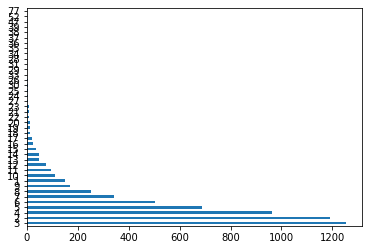

In [5]:
series = data.groupby("OpportunityId").OpportunityId.count()
series.sort_values(inplace=True)
series.head(3000)
series.value_counts().plot(kind = 'barh')
#opportunity_all = series["OpportunityId"]

In [6]:
print(series[-1])

77


In [7]:
all_opportunities = []
opp_longest = series[-1]

all_opor_e = []

#used to fulfill np.array to be with max length
example_arr = []

for index, row in data.iterrows():
    #print(row)
    all_opportunities.append(row["OpportunityId"])
all_opportunities = np.unique(all_opportunities)

for index, row in datae.iterrows():
    all_opor_e.append(row["OpportunityId"])
all_opor_e = np.unique(all_opor_e)
#print(all_opportunities)

In [30]:
#for each opportunity and not id
#def
#here
#
#[license, service, upgrade, renewal, oem, global, new customer]
type_array = [0, 0, 0, 0, 0, 0, 0]
############
def create_dict(df, column):
    index_dict = {}

    all_unique_values = df[column].unique()
    tmp = []

    for el in all_unique_values:
        if el is not np.nan:
            tmp.append(el)

    all_unique_values = tmp

    for i in range(0, len(all_unique_values)):
           index_dict[all_unique_values[i]] = i

    return index_dict


def flag_arr(dict, str):
    arr = [0] * len(dict)

    if str in dict:
        arr[dict[str]] = 1
    arr = np.array(arr)

    return arr



types_to_index = create_dict(data, "Type")
lead_source_to_index = create_dict(data, "LeadSource")
owner_id_to_index = create_dict(data, "OwnerId")
fiscal_quarter_to_index = create_dict(data, "FiscalQuarter")
fiscal_year_to_index = create_dict(data, "FiscalYear")
company_s_crm_typec_to_index = create_dict(data, "Company_s_CRM_Type__c")
deal_typec_to_index = create_dict(data, "Deal_type__c")
source_typec_to_index = create_dict(data, "Source_Type__c")
original_lead_sourcec_to_index = create_dict(data, "Original_Lead_Source__c")
original_lead_source_details__c_to_index = create_dict(data, "Original_Lead_Source_Details__c")
stage_sort_order = create_dict(data, "StageSortOrder")
created_by_id = create_dict(data, "CreatedById")

print(len(list(types_to_index)))
print(len(list(lead_source_to_index)))
print(len(list(owner_id_to_index)))
print(len(list(fiscal_quarter_to_index)))
print(len(list(fiscal_year_to_index)))
print(len(list(company_s_crm_typec_to_index)))
print(len(list(deal_typec_to_index)))
print(len(list(source_typec_to_index)))
print(len(list(original_lead_sourcec_to_index)))
print(len(list(original_lead_source_details__c_to_index)))
print(len(list(stage_sort_order)))
print(len(list(created_by_id)))
print(flag_arr(types_to_index, "Licenses"))
############



8
6
47
4
18
10
3
14
6
20
10
59
[1 0 0 0 0 0 0 0]


In [11]:
all_opportunities_array = []
final_probability_array = []

for opportunity in all_opportunities:
    opp_id = opportunity
    specific_opportinity = data.loc[(data.OpportunityId == opp_id)]

    specific_opportinity = specific_opportinity.sort_values(by="CreatedDateForInsert", ascending=True)

    start_date = specific_opportinity.loc[specific_opportinity.index[0], "CreatedDate"]
    start_date = datetime.strptime(start_date, '%m/%d/%Y %H:%M')

    val_arr = []
    val_ch = []
    res_arr = []
    time_filler = []
    arr = []
    i = 0
    j = 0

    for current in specific_opportinity["CreatedDateForInsert"]:
        current_date = datetime.strptime(current, '%m/%d/%Y %H:%M')
        res_arr.append(int((current_date - start_date).days))
        if j == 0:
            arr.append(int((current_date - start_date).days))
            j+=1
        else:
            arr.append(int((current_date - start_date).days) - arr[j-1])
            j+=1

        spc = len(specific_opportinity.index)

        time_filler = np.ones(spc) * 0.0
        arr_temp = np.append(arr,time_filler)
        arr_temp = arr_temp[:spc]

        res_arr_temp = np.append(res_arr,time_filler)
        res_arr_temp = res_arr_temp[:spc]

        val_arr.append(specific_opportinity.loc[specific_opportinity.index[i], "Amount"])
        #print(val_arr)
        if(i != 0):
            val_ch.append((val_arr[i] - val_arr[i-1]))
        else:
            val_ch.append(0)
        val_ch_temp = np.append(val_ch, time_filler)
        val_ch_temp = val_ch_temp[:spc]

        sp_save = specific_opportinity

        specific_opportinity1 = specific_opportinity.loc[:, ["Probability"]]
        specific_opportinity1.insert(1, "Duration", res_arr_temp)
        specific_opportinity1.insert(2, "DeltaDuration", arr_temp)
        specific_opportinity1.insert(3, "DeltaAmount", val_ch_temp)

        final_probability = specific_opportinity1.iloc[i, specific_opportinity1.columns.get_loc('Probability')]
        final_probability_array.append(final_probability)
        #print(final_probability)
        opp_array = np.array(specific_opportinity1.iloc[:i+1]).flatten()
        #print(opp_array)
        #l = input()
        padding = np.ones(80) * 0.0
        op_ar_new = np.append(padding,opp_array)
        opp_array = op_ar_new[-80:]
        #print(opp_array)
        ### PART FOR INFO ADD ###
        opp_array = np.append(opp_array,val_arr[i])
        ###
        ### PART FOR DICTIONARY CHEKS ###
        opp_array = np.append(opp_array, flag_arr(types_to_index, sp_save.loc[sp_save.index[i], "Type"]))
        opp_array = np.append(opp_array, flag_arr(lead_source_to_index, sp_save.loc[sp_save.index[i], "LeadSource"]))
        opp_array = np.append(opp_array, flag_arr(owner_id_to_index, sp_save.loc[sp_save.index[i], "OwnerId"]))
        opp_array = np.append(opp_array, flag_arr(fiscal_quarter_to_index, sp_save.loc[sp_save.index[i], "FiscalQuarter"]))
        opp_array = np.append(opp_array, flag_arr(fiscal_year_to_index, sp_save.loc[sp_save.index[i], "FiscalYear"]))
        opp_array = np.append(opp_array, flag_arr(company_s_crm_typec_to_index, sp_save.loc[sp_save.index[i], "Company_s_CRM_Type__c"]))
        opp_array = np.append(opp_array, flag_arr(deal_typec_to_index, sp_save.loc[sp_save.index[i], "Deal_type__c"]))
        opp_array = np.append(opp_array, flag_arr(source_typec_to_index, sp_save.loc[sp_save.index[i], "Source_Type__c"]))
        opp_array = np.append(opp_array, flag_arr(original_lead_sourcec_to_index, sp_save.loc[sp_save.index[i], "Original_Lead_Source__c"]))
        opp_array = np.append(opp_array, flag_arr(original_lead_source_details__c_to_index, sp_save.loc[sp_save.index[i], "Original_Lead_Source_Details__c"]))
        opp_array = np.append(opp_array, flag_arr(stage_sort_order, sp_save.loc[sp_save.index[i], "StageSortOrder"]))
        opp_array = np.append(opp_array, flag_arr(created_by_id, sp_save.loc[sp_save.index[i], "CreatedById"]))
        #print(opp_array)
        ###
        all_opportunities_array.append(opp_array)
        i+=1

#size = 286

print("Train completed")

all_opp_e_f = []
fl_prob_e_f = []
# doredachit
for opportunity in all_opor_e:
    opp_id = opportunity
    specific_opportinity = datae.loc[(datae.OpportunityId == opp_id)]

    specific_opportinity = specific_opportinity.sort_values(by="CreatedDateForInsert", ascending=True)

    start_date = specific_opportinity.loc[specific_opportinity.index[0], "CreatedDate"]
    start_date = datetime.strptime(start_date, '%m/%d/%Y %H:%M')

    val_arr = []
    val_ch = []
    res_arr = []
    time_filler = []
    arr = []
    i = 0
    j = 0

    for current in specific_opportinity["CreatedDateForInsert"]:
        current_date = datetime.strptime(current, '%Y-%m-%d %H:%M:%S')
        res_arr.append(int((current_date - start_date).days))
        if j == 0:
            arr.append(int((current_date - start_date).days))
            j+=1
        else:
            arr.append(int((current_date - start_date).days) - arr[j-1])
            j+=1

        spc = len(specific_opportinity.index)

        time_filler = np.ones(spc) * 0.0
        arr_temp = np.append(arr,time_filler)
        arr_temp = arr_temp[:spc]

        res_arr_temp = np.append(res_arr,time_filler)
        res_arr_temp = res_arr_temp[:spc]

        val_arr.append(specific_opportinity.loc[specific_opportinity.index[i], "Amount"])
        #print(val_arr)
        if(i != 0):
            val_ch.append((val_arr[i] - val_arr[i-1]))
        else:
            val_ch.append(0)
        val_ch_temp = np.append(val_ch, time_filler)
        val_ch_temp = val_ch_temp[:spc]

        sp_save = specific_opportinity

        specific_opportinity1 = specific_opportinity.loc[:, ["Probability"]]
        specific_opportinity1.insert(1, "Duration", res_arr_temp)
        specific_opportinity1.insert(2, "DeltaDuration", arr_temp)
        specific_opportinity1.insert(3, "DeltaAmount", val_ch_temp)

        final_probability = specific_opportinity1.iloc[i, specific_opportinity1.columns.get_loc('Probability')]
        fl_prob_e_f.append(final_probability)
        #print(final_probability)
        opp_array = np.array(specific_opportinity1.iloc[:i+1]).flatten()
        #print(opp_array)
        #l = input()
        padding = np.ones(80) * 0.0
        op_ar_new = np.append(padding,opp_array)
        opp_array = op_ar_new[-80:]
        #print(opp_array)
        ### PART FOR INFO ADD ###
        opp_array = np.append(opp_array,val_arr[i])
        ###
        ### PART FOR DICTIONARY CHEKS ###
        opp_array = np.append(opp_array, flag_arr(types_to_index, sp_save.loc[sp_save.index[i], "Type"]))
        opp_array = np.append(opp_array, flag_arr(lead_source_to_index, sp_save.loc[sp_save.index[i], "LeadSource"]))
        opp_array = np.append(opp_array, flag_arr(owner_id_to_index, sp_save.loc[sp_save.index[i], "OwnerId"]))
        opp_array = np.append(opp_array, flag_arr(fiscal_quarter_to_index, sp_save.loc[sp_save.index[i], "FiscalQuarter"]))
        opp_array = np.append(opp_array, flag_arr(fiscal_year_to_index, sp_save.loc[sp_save.index[i], "FiscalYear"]))
        opp_array = np.append(opp_array, flag_arr(company_s_crm_typec_to_index, sp_save.loc[sp_save.index[i], "Company_s_CRM_Type__c"]))
        opp_array = np.append(opp_array, flag_arr(deal_typec_to_index, sp_save.loc[sp_save.index[i], "Deal_type__c"]))
        opp_array = np.append(opp_array, flag_arr(source_typec_to_index, sp_save.loc[sp_save.index[i], "Source_Type__c"]))
        opp_array = np.append(opp_array, flag_arr(original_lead_sourcec_to_index, sp_save.loc[sp_save.index[i], "Original_Lead_Source__c"]))
        opp_array = np.append(opp_array, flag_arr(original_lead_source_details__c_to_index, sp_save.loc[sp_save.index[i], "Original_Lead_Source_Details__c"]))
        opp_array = np.append(opp_array, flag_arr(stage_sort_order, sp_save.loc[sp_save.index[i], "StageSortOrder"]))
        opp_array = np.append(opp_array, flag_arr(created_by_id, sp_save.loc[sp_save.index[i], "CreatedById"]))
        #print(opp_array)
        ###
        all_opp_e_f.append(opp_array)
        i+=1

#size = 286
# for opportunity in all_opor_e:
#     opp_id = opportunity
#     specific_opportinity = datae.loc[(datae.OpportunityId == opp_id)]
#
#     specific_opportinity = specific_opportinity.sort_values(by="CreatedDateForInsert", ascending=True)
#
#     start_date = specific_opportinity.loc[specific_opportinity.index[0], "CreatedDate"]
#     start_date = datetime.strptime(start_date, '%m/%d/%Y %H:%M')
#
#     res_arr = []
#     arr = []
#     i = 0
#     j = 0
#     for current in specific_opportinity["CreatedDateForInsert"]:
#         current_date = datetime.strptime(current, '%Y-%m-%d %H:%M:%S')
#         res_arr.append(int((current_date - start_date).days))
#         if j == 0:
#             arr.append(int((current_date - start_date).days))
#             j+=1
#         else:
#             arr.append(int((current_date - start_date).days) - arr[j-1])
#             j+=1
#
#     specific_opportinity = specific_opportinity.loc[:, ["Amount", "Probability"]]
#     specific_opportinity.insert(2, "Duration", res_arr)
#     specific_opportinity.insert(3, "DeltaDuration", arr)
#     final_probability = specific_opportinity.iloc[-1, specific_opportinity.columns.get_loc('Probability')]
#     fl_prob_e_f.append(final_probability)
#
#     opp_array = np.array(specific_opportinity.iloc[-20:]).flatten()
#
#     padding = np.ones(100) * 0.0
#     op_ar_new = np.append(padding,opp_array)
#     opp_array = op_ar_new[-80:]
#     all_opp_e_f.append(opp_array)



Train completed


In [12]:
all_opportunities_array1 = np.asarray(all_opportunities_array)
final_probability_array1 = np.asarray(final_probability_array)

all_opor_e_f1 = np.asarray(all_opp_e_f)
fl_prob_e_f1 = np.asarray(fl_prob_e_f)

In [13]:
print(all_opportunities_array1)
print(all_opor_e_f1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
def base_model():
  inputs = tf.keras.Input(shape=(286,))
  x = tf.keras.layers.Dense(128, activation='relu')(inputs)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  outputs = tf.keras.layers.Dense(101, activation='softmax')(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
model = base_model()
model.compile(optimizer=optimizer, loss=loss_object, metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 217)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                13952     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 101)               6565      
                                                                 
Total params: 24,677
Trainable params: 24,677
Non-trainable params: 0
_________________________________________________________________


In [25]:
def train_step(x, y):
  with tf.GradientTape() as tape:
    pred = model(x)
    loss = model.compiled_loss(y, pred)
    gradients = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return tf.linalg.global_norm(gradients)

In [26]:

def create_generator(list_of_arrays):
    for i in list_of_arrays:
        yield i


In [27]:
dataset_opport = tf.data.Dataset.from_generator(lambda: create_generator(all_opportunities_array1),output_types= tf.int32, output_shapes=(286,))
dataset_marks = tf.data.Dataset.from_generator(lambda: final_probability_array1,output_types= tf.int32, output_shapes=())

dataset_test27 = tf.data.Dataset.zip((dataset_opport, dataset_marks)).batch(1)

dataset_opport_e = tf.data.Dataset.from_generator(lambda: create_generator(all_opor_e_f1),output_types= tf.int32, output_shapes=(286,))
dataset_marks_e = tf.data.Dataset.from_generator(lambda: fl_prob_e_f1,output_types= tf.int32, output_shapes=())

dataset_test27_e = tf.data.Dataset.zip((dataset_opport_e, dataset_marks_e)).batch(1)

In [28]:
print(dataset_test27)
print(dataset_test27_e)

<BatchDataset element_spec=(TensorSpec(shape=(None, 217), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 217), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [22]:
print(len(list(dataset_test27)))
print(len(list(dataset_test27_e)))

for x,y in dataset_test27.take(1):
  print(x)
  print(y)

print(dataset_test27.take(1))
print(dataset_test27_e.take(1))


30493
4603
tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 100   0   0   0   0   1   0   0   0   0   0   0   0   1
    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]], shape=(1, 217), dtype=int32)
tf.Tensor([100], shape=(1,), dtype=int32)
<TakeDatas

In [29]:
from tqdm import tqdm
epoch_num = 5
grad_norm = []
for epoch in range(epoch_num):
  for step, (x,y) in enumerate(tqdm(dataset_test27)):
    grad_norm.append(train_step(x,y))

  loss, acc = model.evaluate(dataset_test27_e)
  print("validation loss = {}, accuracy = {}:".format(loss, acc))

30493it [05:01, 100.98it/s]


4603/4603 [==============================] - 5s 1ms/step - loss: 2.9672 - root_mean_squared_error: 57.6329
validation loss = 2.9672017097473145, accuracy = 57.632896423339844:


2047it [00:19, 106.81it/s]


KeyboardInterrupt: 

In [ ]:
from matplotlib import rcParams
rcParams['ytick.labelleft'] = True
plt.plot(grad_norm)

